In [1]:
# Importing the modules 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.drop(['id', 'grade'], inplace=True, axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df['date'] = df['date'].apply(lambda x: np.float(x.split('T')[0]))
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209.0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225.0,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209.0,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209.0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225.0,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209.0,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
prices = df['price']
dfmp = df.loc[:, df.columns != 'price']
df = (dfmp - dfmp.mean())/(dfmp.max() - dfmp.min())
df['price'] = prices

train_validation_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

train_data,val_data = train_test_split(train_validation_data,train_size = 0.7,random_state=3)

/home/tiago/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.288246,-0.011238,-0.139345,-0.067917,-0.005729,-0.197724,-0.007542,-0.058576,-0.102357,-0.066710,-0.060479,-0.139175,-0.041887,0.505355,-0.078579,-0.035800,-0.111264,-0.008177,221900.0
1,-0.268695,-0.011238,0.016905,0.036989,-0.004764,0.202276,-0.007542,-0.058576,-0.102357,0.041843,0.022508,-0.173958,0.946202,0.237678,0.258883,-0.087295,-0.051033,-0.005892,538000.0
2,0.630657,-0.041541,-0.139345,-0.098860,-0.003094,-0.197724,-0.007542,-0.058576,-0.102357,-0.111666,-0.060479,-0.330479,-0.041887,-0.252221,0.286066,-0.015867,0.126217,-0.005406,180000.0
3,-0.268695,0.019065,0.110655,-0.009049,-0.006122,-0.197724,-0.007542,-0.058576,0.397643,-0.080964,0.128318,-0.052219,-0.041887,0.293233,-0.063137,-0.148757,-0.107822,-0.008924,604000.0
4,0.629958,-0.011238,-0.014345,-0.030181,-0.004257,-0.197724,-0.007542,-0.058576,-0.102357,-0.011885,-0.060479,0.139086,-0.041887,-0.019898,0.091278,0.140279,-0.032103,-0.006048,510000.0


In [7]:
xs = train_data.drop('price', axis=1).values
ys = train_data['price'].values

val_ys = val_data['price'].values
val_xs = val_data.drop('price', axis=1).values

In [8]:
def show_loss_chart(history):
    loss = history.history['_loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def show_accuracy_chart(history):
    acc = history.history['mean_absolute_error']
    val_acc = history.history['val_mean_absolute_error']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training mean_absolute_error')
    plt.plot(epochs, val_acc, 'b', label='Validation mean_absolute_error')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Abs Error')
    plt.legend()
    plt.show()

In [60]:
from keras import models
from keras import layers
from keras.models import Model


inp = layers.Input((xs.shape[1],))
x = layers.Dense(16, activation='relu')(inp)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

out1 = layers.Dense(1, activation='linear', name='price')(x)

model = Model(inputs=inp, outputs=[out1])

from keras import optimizers

rmsprop = optimizers.RMSprop(lr=0.1)

model.compile(optimizer=rmsprop, loss=['mse'], 
              metrics={'price': 'mae'})

Train on 12103 samples, validate on 5187 samples
Epoch 1/50
12103/12103 [==============================] - 1s 41us/step - loss: 18658133033.7113 - mean_absolute_error: 83623.5900 - val_loss: 21103283226.6266 - val_mean_absolute_error: 94128.9526
Epoch 2/50
12103/12103 [==============================] - 1s 43us/step - loss: 18449917511.4084 - mean_absolute_error: 83469.5409 - val_loss: 19910891783.7733 - val_mean_absolute_error: 86578.7256
Epoch 3/50
12103/12103 [==============================] - 1s 45us/step - loss: 18432802094.8089 - mean_absolute_error: 82326.4280 - val_loss: 24127111982.8371 - val_mean_absolute_error: 92677.3805
Epoch 4/50
12103/12103 [==============================] - 1s 43us/step - loss: 18546943539.5680 - mean_absolute_error: 82793.8161 - val_loss: 19696336931.4980 - val_mean_absolute_error: 82506.9477
Epoch 5/50
12103/12103 [==============================] - 0s 41us/step - loss: 18019067306.4199 - mean_absolute_error: 81976.6843 - val_loss: 21360261197.4367 - va

12103/12103 [==============================] - 1s 59us/step - loss: 15165277160.1408 - mean_absolute_error: 75710.4188 - val_loss: 16940743461.5955 - val_mean_absolute_error: 76929.2458
Epoch 43/50
12103/12103 [==============================] - 1s 59us/step - loss: 15039811717.7427 - mean_absolute_error: 75190.7367 - val_loss: 20206957027.5473 - val_mean_absolute_error: 87014.7806
Epoch 44/50
12103/12103 [==============================] - 1s 60us/step - loss: 15392319335.1995 - mean_absolute_error: 75388.1447 - val_loss: 16512114921.6426 - val_mean_absolute_error: 76493.3109
Epoch 45/50
12103/12103 [==============================] - 1s 58us/step - loss: 15124371938.0914 - mean_absolute_error: 76182.9121 - val_loss: 16919098488.2761 - val_mean_absolute_error: 76458.4040
Epoch 46/50
12103/12103 [==============================] - 1s 53us/step - loss: 15017650158.8248 - mean_absolute_error: 75317.0134 - val_loss: 17692078880.0802 - val_mean_absolute_error: 80937.7269
Epoch 47/50
12103/1210

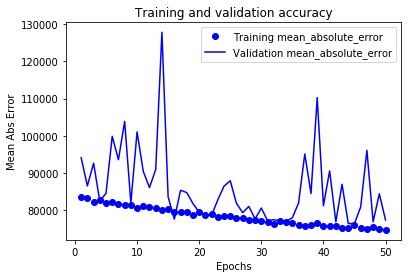

In [62]:
history = model.fit(x=xs,
                    y=ys,
                    epochs=50,
                    validation_data=(val_xs,val_ys))

show_accuracy_chart(history)

In [63]:
test_ys = test_data['price'].values
test_xs = test_data.drop('price', axis=1).values

score, acc = model.evaluate(test_xs,
                            test_ys,
                            batch_size=32)

pv = prices.values

predicted_ys = np.array([x for x in model.predict(test_xs)])

print('Test score:', score)
print('Test accuracy:', acc)
print('R²:', metrics.r2_score(test_ys, predicted_ys))
print('MSE', metrics.mean_absolute_error(test_ys, predicted_ys))

4323/4323 [==============================] - 0s 22us/step
Test score: 16869616095.90377
Test accuracy: 77338.71287300486
R²: 0.8685762755235548
MSE 77338.71251337323


In [12]:
pv.shape

(21613,)